<a href="https://colab.research.google.com/github/ndeekshith/Fake-Review-Detection/blob/main/Fake_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing all the necesarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json, re
from tqdm import tqdm_notebook
from uuid import uuid4
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


import torch
import torch.optim as optim
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Reading the dataset using the pandas
data = pd.read_csv('/content/drive/MyDrive/fake reviews dataset.csv')
data.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [ ]:
data['category'].value_counts().reset_index()

,category,count
0,Kindle_Store_5,4730
1,Books_5,4370
2,Pet_Supplies_5,4254
3,Home_and_Kitchen_5,4056
4,Electronics_5,3988
5,Sports_and_Outdoors_5,3946
6,Tools_and_Home_Improvement_5,3858
7,Clothing_Shoes_and_Jewelry_5,3848
8,Toys_and_Games_5,3794
9,Movies_and_TV_5,3588


<ipython-input-9-1d4384017766>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette=['#FF5733', '#33FF57', '#3357FF'])
<ipython-input-9-1d4384017766>:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='label', data=data, palette=['#FF5733', '#33FF57', '#3357FF'])


<Axes: xlabel='label', ylabel='count'>

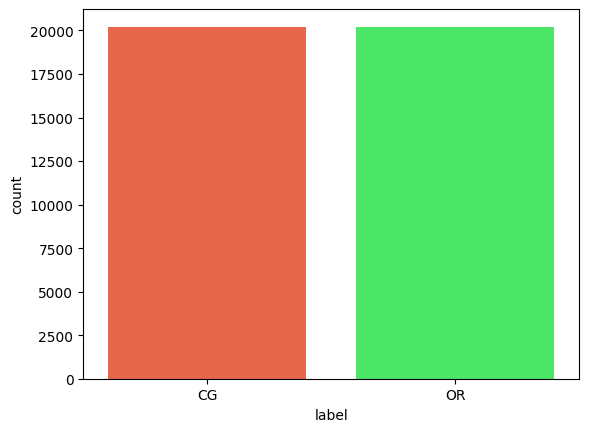

In [ ]:
sns.countplot(x='label', data=data, palette=['#FF5733', '#33FF57', '#3357FF'])

In [ ]:
# Removing the unnecessary columns
data.drop(columns=['category','rating'],inplace=True)

In [ ]:
data.head()

,label,text_
0,CG,"Love this! Well made, sturdy, and very comfor..."
1,CG,"love it, a great upgrade from the original. I..."
2,CG,This pillow saved my back. I love the look and...
3,CG,"Missing information on how to use it, but it i..."
4,CG,Very nice set. Good quality. We have had the s...


In [ ]:
label_map = {
    'CG': 1,
    'OR': 0
}

data['label'] = data['label'].map(label_map)
data.head()

,label,text_
0,1,"Love this! Well made, sturdy, and very comfor..."
1,1,"love it, a great upgrade from the original. I..."
2,1,This pillow saved my back. I love the look and...
3,1,"Missing information on how to use it, but it i..."
4,1,Very nice set. Good quality. We have had the s...


In [ ]:
data['label'].value_counts()

,count
label,
1,20216
0,20216


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   40432 non-null  int64 
 1   text_   40432 non-null  object
dtypes: int64(1), object(1)
memory usage: 631.9+ KB


In [ ]:
# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    data['text_'], data['label'], test_size=0.2, random_state=42
)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (32345,)
Testing data shape: (8087,)


In [ ]:
# Define a function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)

    # Print evaluation metrics
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))

    # Create confusion matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'],
                yticklabels=['Positive', 'Negative'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.tight_layout()
    plt.show()

    return predictions


Building Random Forest Model

Random Forest Results:
Accuracy: 0.8409

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4071
           1       0.83      0.86      0.84      4016

    accuracy                           0.84      8087
   macro avg       0.84      0.84      0.84      8087
weighted avg       0.84      0.84      0.84      8087



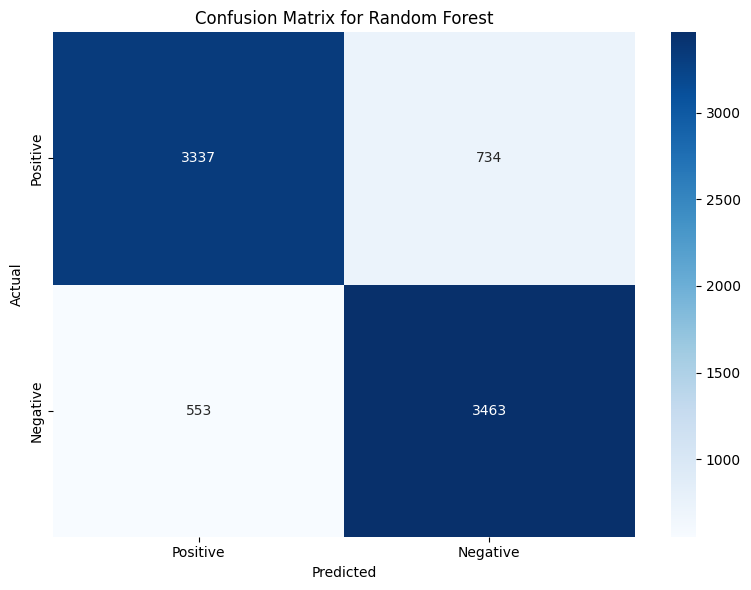

In [ ]:
# 1. Random Forest model
print("\n" + "="*50)
print("Building Random Forest Model")
print("="*50)

rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, min_df=5, max_df=0.7,
                             stop_words='english')),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
rf_preds = evaluate_model(rf_pipeline, X_test, y_test, "Random Forest")


Building Naive Bayes Model

Naive Bayes Results:
Accuracy: 0.8296

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      4071
           1       0.79      0.90      0.84      4016

    accuracy                           0.83      8087
   macro avg       0.84      0.83      0.83      8087
weighted avg       0.84      0.83      0.83      8087



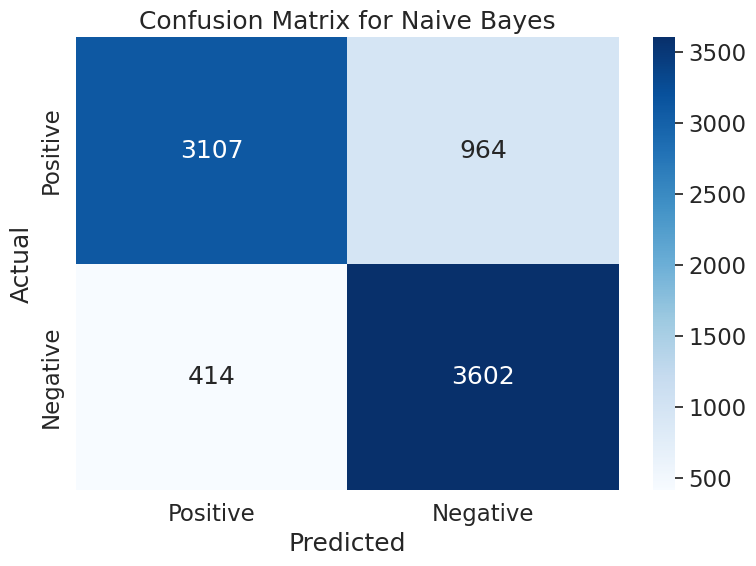

In [ ]:
# 2. Naive Bayes Model
print("\n" + "="*50)
print("Building Naive Bayes Model")
print("="*50)

nb_pipeline = Pipeline([
    ('count_vec', CountVectorizer(stop_words='english')),
    ('classifier', MultinomialNB())
])

nb_pipeline.fit(X_train, y_train)
nb_preds = evaluate_model(nb_pipeline, X_test, y_test, "Naive Bayes")


Building Decision Tree Model

Decision Tree Results:
Accuracy: 0.7372

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      4071
           1       0.73      0.75      0.74      4016

    accuracy                           0.74      8087
   macro avg       0.74      0.74      0.74      8087
weighted avg       0.74      0.74      0.74      8087



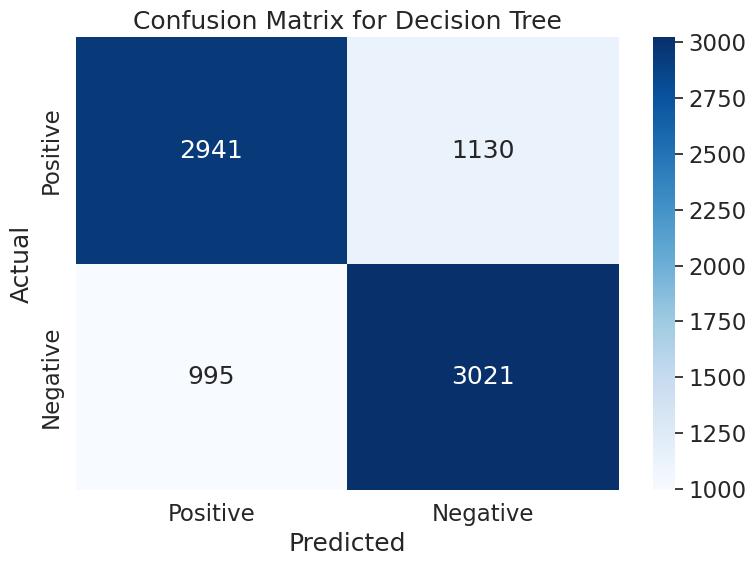

In [ ]:
# 3. Decision tree model
print("\n" + "="*50)
print("Building Decision Tree Model")
print("="*50)

dt_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, min_df=5, max_df=0.7,
                             stop_words='english')),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_pipeline.fit(X_train, y_train)
dt_preds = evaluate_model(dt_pipeline, X_test, y_test, "Decision Tree")


Building Logistic Regression Model

Logistic Regression Results:
Accuracy: 0.8606

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4071
           1       0.87      0.85      0.86      4016

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087



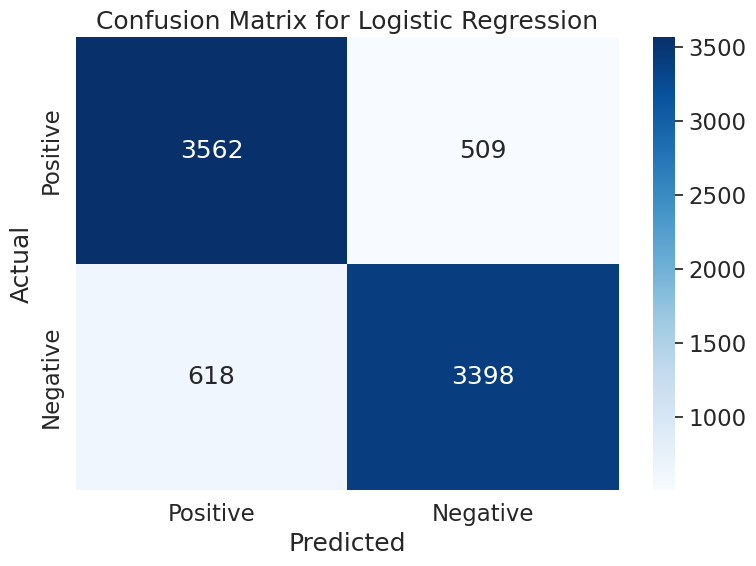

In [ ]:
# 4. Logistic Regression Model (ADDED)
print("\n" + "="*50)
print("Building Logistic Regression Model")
print("="*50)

lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, min_df=5, max_df=0.7,
                             stop_words='english')),
    ('classifier', LogisticRegression(C=1.0, max_iter=1000, random_state=42))
])

lr_pipeline.fit(X_train, y_train)
lr_preds = evaluate_model(lr_pipeline, X_test, y_test, "Logistic Regression")


Model Comparison


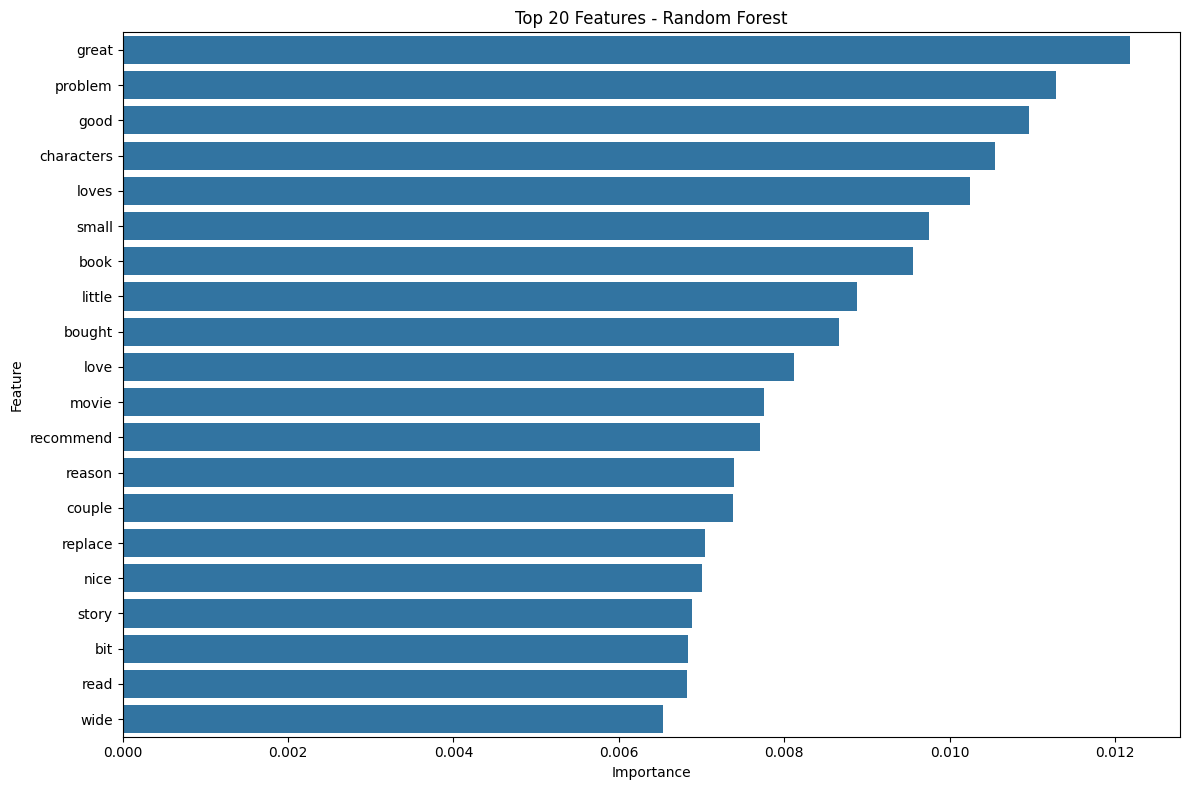

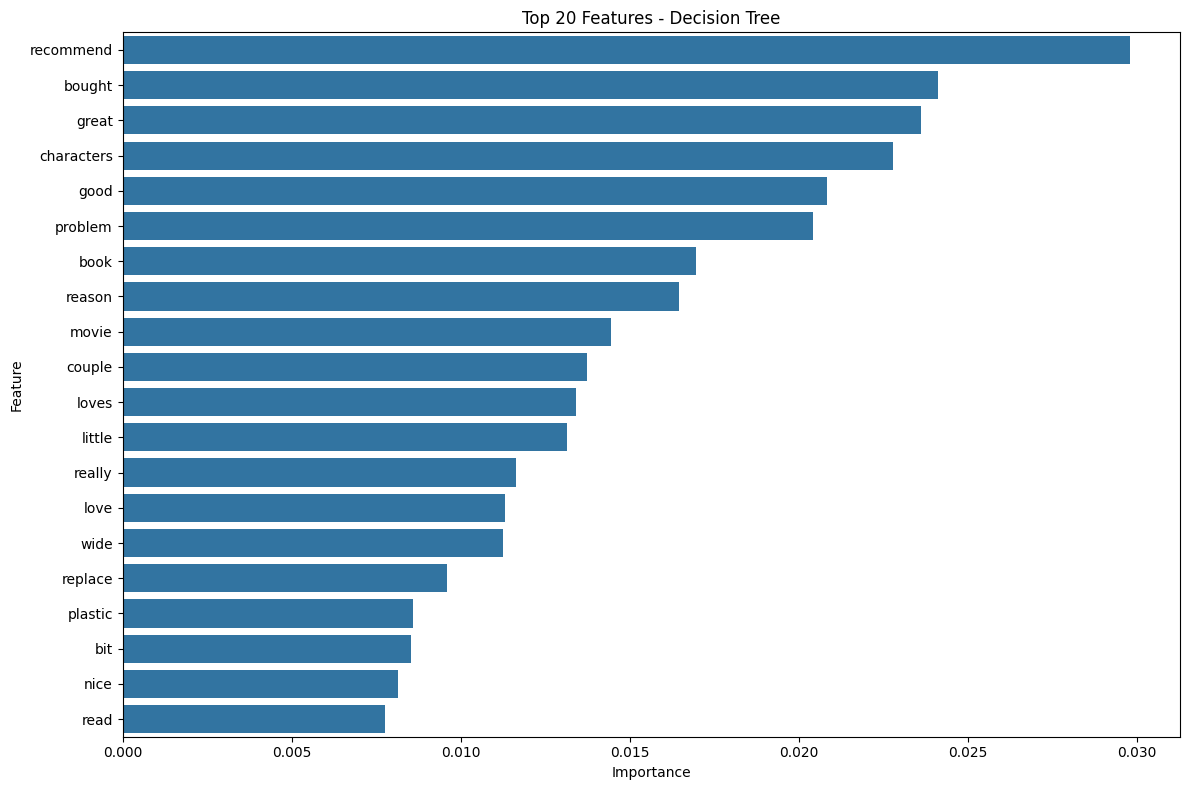

In [ ]:
# Model Comparison
print("\n" + "="*50)
print("Model Comparison")
print("="*50)

# Compare feature importance for Random Forest and Decision Tree
def plot_feature_importance(model, vectorizer, model_name, top_n=20):
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Get feature importances
    importances = model.feature_importances_

    # Create DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Sort by importance
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Top {top_n} Features - {model_name}')
    plt.tight_layout()
    plt.show()

# Get feature importances for Random Forest
rf_vectorizer = rf_pipeline.named_steps['tfidf']
rf_classifier = rf_pipeline.named_steps['classifier']
plot_feature_importance(rf_classifier, rf_vectorizer, "Random Forest")

# Get feature importances for Decision Tree
dt_vectorizer = dt_pipeline.named_steps['tfidf']
dt_classifier = dt_pipeline.named_steps['classifier']
plot_feature_importance(dt_classifier, dt_vectorizer, "Decision Tree")


In [ ]:
# Function to get most informative features for Naive Bayes
def show_most_informative_features_nb(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names_out()
    coefs_with_fns = sorted(zip(clf.feature_log_prob_[0], feature_names)) # Changed coef_ to feature_log_prob_
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])

    print(f"\nMost Informative Features (Naive Bayes):")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print(f"  {fn_1:<20} = {coef_1:>6.4f}    {fn_2:<20} = {coef_2:>6.4f}")

# Show most informative features for Naive Bayes
nb_vectorizer = nb_pipeline.named_steps['count_vec']
nb_classifier = nb_pipeline.named_steps['classifier']
show_most_informative_features_nb(nb_vectorizer, nb_classifier)


Most Informative Features (Naive Bayes):
  001                  = -13.2529    great                = -4.8014
  0383367495           = -13.2529    like                 = -4.9013
  042                  = -13.2529    book                 = -4.9094
  055xprob             = -13.2529    just                 = -4.9624
  0x                   = -13.2529    good                 = -5.0157
  1000x                = -13.2529    love                 = -5.1886
  10a                  = -13.2529    really               = -5.2933
  10d                  = -13.2529    read                 = -5.3733
  10in                 = -13.2529    time                 = -5.4714
  10oz                 = -13.2529    use                  = -5.4768
  10pounds             = -13.2529    story                = -5.4984
  10x10                = -13.2529    little               = -5.5206
  10x45                = -13.2529    don                  = -5.6702
  110lbs               = -13.2529    product              = -5.8456
  1155

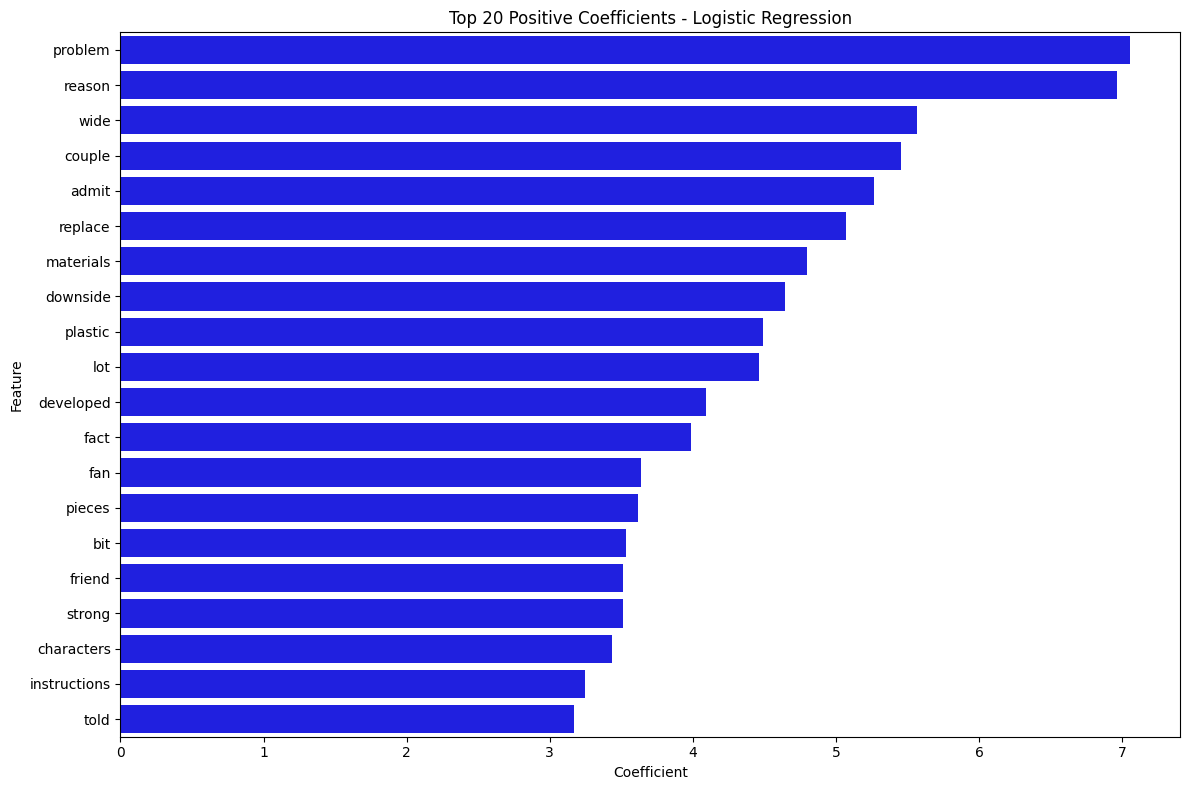

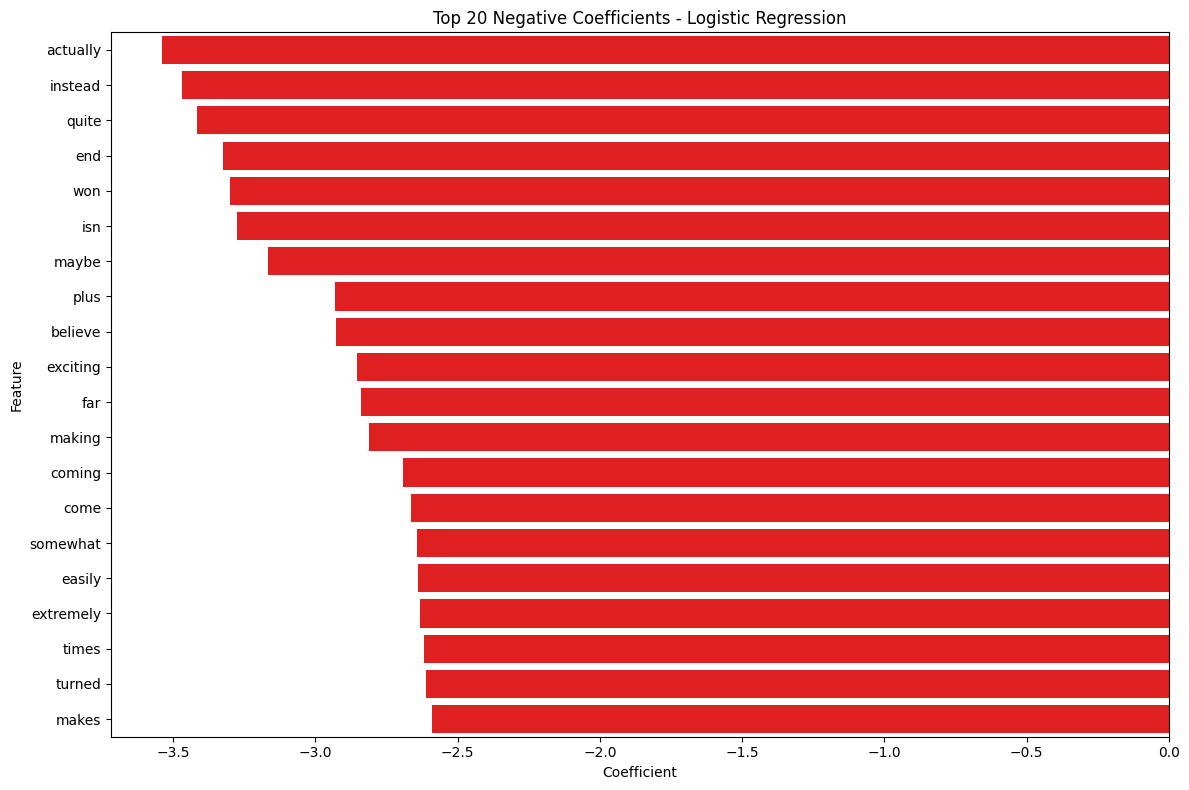

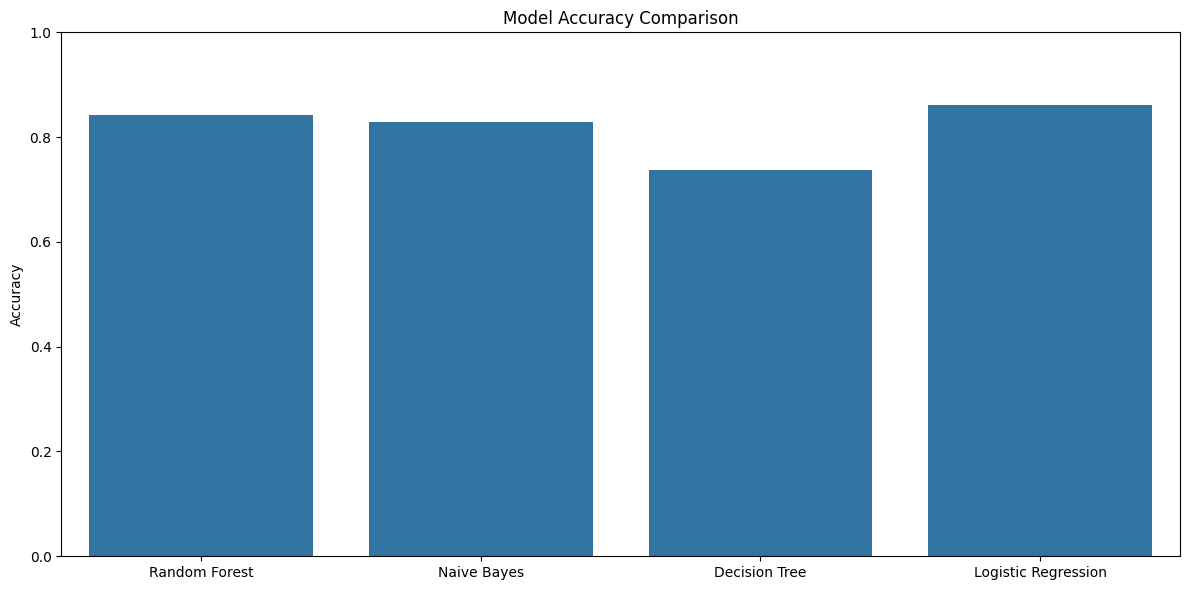

In [ ]:
# Function to visualize coefficients for Logistic Regression (ADDED)
def plot_logistic_regression_coefficients(model, vectorizer, top_n=20):
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Get coefficients
    coefficients = model.coef_[0]

    # Create DataFrame for visualization
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })

    # Sort for positive and negative coefficients
    top_positive = coef_df.sort_values('Coefficient', ascending=False).head(top_n)
    top_negative = coef_df.sort_values('Coefficient', ascending=True).head(top_n)

    # Plot positive coefficients
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=top_positive, color='blue')
    plt.title(f'Top {top_n} Positive Coefficients - Logistic Regression')
    plt.tight_layout()
    plt.show()

    # Plot negative coefficients
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=top_negative, color='red')
    plt.title(f'Top {top_n} Negative Coefficients - Logistic Regression')
    plt.tight_layout()
    plt.show()

# Visualize logistic regression coefficients (ADDED)
lr_vectorizer = lr_pipeline.named_steps['tfidf']
lr_classifier = lr_pipeline.named_steps['classifier']
plot_logistic_regression_coefficients(lr_classifier, lr_vectorizer)

# Compare all models (UPDATED to include Logistic Regression)
models = ['Random Forest', 'Naive Bayes', 'Decision Tree', 'Logistic Regression']
accuracies = [
    accuracy_score(y_test, rf_preds),
    accuracy_score(y_test, nb_preds),
    accuracy_score(y_test, dt_preds),
    accuracy_score(y_test, lr_preds)
]

plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


In [ ]:
import joblib
import os

def save_models(models, save_dir="/content/drive/MyDrive"):
    """Save multiple models to the specified directory."""
    # Create directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    # Save each model
    for filename, model in models.items():
        file_path = os.path.join(save_dir, filename)
        joblib.dump(model, file_path)
        print(f"Saved: {file_path}")

    print("\nAll models saved to disk.")

# Define models and filenames
models = {
    "random_forest_model.pkl": rf_pipeline,
    "naive_bayes_model.pkl": nb_pipeline,
    "decision_tree_model.pkl": dt_pipeline,
    "logistic_regression_model.pkl": lr_pipeline,
}

# Specify the directory where models should be saved
save_models(models, save_dir="saved_models/")


Saved: saved_models/random_forest_model.pkl
Saved: saved_models/naive_bayes_model.pkl
Saved: saved_models/decision_tree_model.pkl
Saved: saved_models/logistic_regression_model.pkl

All models saved to disk.


In [ ]:
# Function to predict sentiment for new reviews
def predict_sentiment(text, model):
    # Preprocess text (same as training data)
    prediction = model.predict([text])
    probability = model.predict_proba([text])

    sentiment = "Positive" if prediction[0] == 0 else "Negative"
    confidence = probability[0][prediction[0]]

    return sentiment, confidence

# Example usage (UPDATED to include Logistic Regression)
sample_review = "I love this product! It's amazing and works perfectly."
print(f"\nSample Review: '{sample_review}'")

# Test with all models
for model_name, model in [
    ("Random Forest", rf_pipeline),
    ("Naive Bayes", nb_pipeline),
    ("Decision Tree", dt_pipeline),
    ("Logistic Regression", lr_pipeline)
]:
    sentiment, confidence = predict_sentiment(sample_review, model)
    print(f"Predicted Sentiment ({model_name}): {sentiment} with {confidence:.4f} confidence")


Sample Review: 'I love this product! It's amazing and works perfectly.'
Predicted Sentiment (Random Forest): Positive with 0.5000 confidence
Predicted Sentiment (Naive Bayes): Negative with 0.9564 confidence
Predicted Sentiment (Decision Tree): Negative with 1.0000 confidence
Predicted Sentiment (Logistic Regression): Negative with 0.6662 confidence


In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
from torch.optim import AdamW
from transformers import (
    BertForSequenceClassification,
    BertTokenizer,
    RobertaForSequenceClassification,
    RobertaTokenizer
)

# BERT
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                           num_labels = 2,
                                                           output_attentions = False,
                                                           output_hidden_states = False
                                                          )
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model.cuda()

print(' Base models loaded')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

 Base models loaded


In [ ]:
sentences = data['text_'].values
labels = data['label'].values
data['text_'][5]

'I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.'

In [ ]:
print('Original: ', sentences[0])
print('Tokenized BERT: ', bert_tokenizer.tokenize(sentences[0]))
print('Token IDs BERT: ', bert_tokenizer.convert_tokens_to_ids(bert_tokenizer.tokenize(sentences[0])))

Original:  Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty
Tokenized BERT:  ['love', 'this', '!', 'well', 'made', ',', 'sturdy', ',', 'and', 'very', 'comfortable', '.', 'i', 'love', 'it', '!', 'very', 'pretty']
Token IDs BERT:  [2293, 2023, 999, 2092, 2081, 1010, 23073, 1010, 1998, 2200, 6625, 1012, 1045, 2293, 2009, 999, 2200, 3492]


In [ ]:
sequence = """Will Your Hometown Be Taking In Obama’s Refugees? Here’s The List Of Cities Where They’re Being Transplanted 🏙️"""

bert_tokenized_sequence = bert_tokenizer.tokenize(sequence)

print("""Will Your Hometown Be Taking In Obama’s Refugees? Here’s The List Of Cities Where They’re Being Transplanted 🏙️""")
print("BERT:", bert_tokenized_sequence)

Will Your Hometown Be Taking In Obama’s Refugees? Here’s The List Of Cities Where They’re Being Transplanted 🏙️
BERT: ['will', 'your', 'hometown', 'be', 'taking', 'in', 'obama', '’', 's', 'refugees', '?', 'here', '’', 's', 'the', 'list', 'of', 'cities', 'where', 'they', '’', 're', 'being', 'transplant', '##ed', '[UNK]']


In [ ]:
bert_input_ids = []
bert_attention_masks = []
sentence_ids = []
counter = 0

for sent in sentences:
    bert_encoded_dict = bert_tokenizer.encode_plus(
                        sent,                           # Sentence to encode.
                        add_special_tokens = True,      # Add '[CLS]' and '[SEP]'
                        max_length = 512,              # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',          # Return pytorch tensors.
                   )

    bert_input_ids.append(bert_encoded_dict['input_ids'])
    bert_attention_masks.append(bert_encoded_dict['attention_mask'])
    sentence_ids.append(counter)
    counter  = counter + 1

bert_input_ids = torch.cat(bert_input_ids, dim=0)
bert_attention_masks = torch.cat(bert_attention_masks, dim=0)

labels = torch.tensor(labels)
sentence_ids = torch.tensor(sentence_ids)

print('Original: ', sentences[1])
print('Token IDs BERT:', bert_input_ids[1])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  love it, a great upgrade from the original.  I've had mine for a couple of years
Token IDs BERT: tensor([  101,  2293,  2009,  1010,  1037,  2307, 12200,  2013,  1996,  2434,
         1012,  1045,  1005,  2310,  2018,  3067,  2005,  1037,  3232,  1997,
         2086,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0

In [ ]:
from torch.utils.data import TensorDataset, random_split
# function to seed the script globally
torch.manual_seed(0)

# Combine the training inputs into a TensorDataset.
bert_dataset = TensorDataset(sentence_ids, bert_input_ids, bert_attention_masks, labels)

In [ ]:
def index_remover(tensordata):
    input_ids = []
    attention_masks = []
    labels = []

    for a,b,c,d in tensordata:
        input_ids.append(b.tolist())
        attention_masks.append(c.tolist())
        labels.append(d.tolist())

    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)
    labels = torch.tensor(labels)

    final_dataset =  TensorDataset(input_ids, attention_masks, labels)
    return final_dataset

trial_dataset =  index_remover(bert_dataset)
trial_dataset[0]

(tensor([  101,  2293,  2023,   999,  2092,  2081,  1010, 23073,  1010,  1998,
          2200,  6625,  1012,  1045,  2293,  2009,   999,  2200,  3492,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,  

In [ ]:
train_size = int(0.9 * len(bert_dataset))
val_size = len(bert_dataset) - train_size

bert_train_dataset, bert_val_dataset = random_split(bert_dataset, [train_size, val_size])

train_size = int(0.9 * len(bert_train_dataset))
test_size = len(bert_train_dataset) - train_size

bert_train_dataset, bert_test_dataset = random_split(bert_train_dataset, [train_size, test_size])

sentence_ids_list_valid = []
for a,b,c,d in bert_val_dataset:
  sentence_ids_list_valid.append(a.tolist())

bert_train_dataset = index_remover(bert_train_dataset)
bert_val_dataset = index_remover(bert_val_dataset)
bert_test_dataset = index_remover(bert_test_dataset)

label_temp_list = []
for a,b,c in bert_train_dataset:
  label_temp_list.append(c)

print('{:>5,} training samples'.format(train_size))
print('{:>5,} training samples with real fake review'.format(sum(label_temp_list)))


label_temp_list = []
for a,b,c in bert_val_dataset:
  label_temp_list.append(c)

print('{:>5,} validation samples'.format(val_size))
print('{:>5,} validation samples with real fake review'.format(sum(label_temp_list)))

label_temp_list = []
for a,b,c in bert_test_dataset:
  label_temp_list.append(c)

print('{:>5,} test samples'.format(test_size))
print('{:>5,} test samples with real fake review'.format(sum(label_temp_list)))

32,749 training samples
16,407 training samples with real fake review
4,044 validation samples
2,011 validation samples with real fake review
3,639 test samples
1,798 test samples with real fake review


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 10

bert_train_dataloader = DataLoader(
            bert_train_dataset,
            sampler = RandomSampler(bert_train_dataset),
            batch_size = batch_size
        )

bert_validation_dataloader = DataLoader(
            bert_val_dataset,
            sampler = SequentialSampler(bert_val_dataset),
            batch_size = batch_size
        )

bert_test_dataloader = DataLoader(
            bert_test_dataset,
            sampler = SequentialSampler(bert_test_dataset),
            batch_size = batch_size
        )

In [ ]:
bert_optimizer = AdamW(bert_model.parameters(), lr = 5e-5, eps = 1e-8)

In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 4

total_steps = len(bert_train_dataloader) * epochs

bert_scheduler = get_linear_schedule_with_warmup(bert_optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random

seed_val = 100

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

bert_training_stats = []

total_t0 = time.time()

for epoch_i in range(0, epochs):

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0

    bert_model.train()

    for step, batch in enumerate(bert_train_dataloader):

        if step % 100 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(bert_train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        bert_model.zero_grad()

        outputs = bert_model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels)
        loss = outputs[0]
        logits = outputs[1]
        total_train_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(bert_model.parameters(), 1.0)

        bert_optimizer.step()

        bert_scheduler.step()

    avg_train_loss = total_train_loss / len(bert_train_dataloader)

    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))

    print("")
    print("Running Validation...")

    t0 = time.time()

    bert_model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    for batch in bert_validation_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():

            outputs = bert_model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs[0]
        logits = outputs[1]
        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)


    avg_val_accuracy = total_eval_accuracy / len(bert_validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(bert_validation_dataloader)

    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    bert_training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch   100  of  3,275.    Elapsed: 0:01:33.
  Batch   200  of  3,275.    Elapsed: 0:03:05.
  Batch   300  of  3,275.    Elapsed: 0:04:37.
  Batch   400  of  3,275.    Elapsed: 0:06:09.
  Batch   500  of  3,275.    Elapsed: 0:07:41.
  Batch   600  of  3,275.    Elapsed: 0:09:13.
  Batch   700  of  3,275.    Elapsed: 0:10:45.
  Batch   800  of  3,275.    Elapsed: 0:12:17.
  Batch   900  of  3,275.    Elapsed: 0:13:49.
  Batch 1,000  of  3,275.    Elapsed: 0:15:21.
  Batch 1,100  of  3,275.    Elapsed: 0:16:53.
  Batch 1,200  of  3,275.    Elapsed: 0:18:25.
  Batch 1,300  of  3,275.    Elapsed: 0:19:57.
  Batch 1,400  of  3,275.    Elapsed: 0:21:28.
  Batch 1,500  of  3,275.    Elapsed: 0:23:00.
  Batch 1,600  of  3,275.    Elapsed: 0:24:32.
  Batch 1,700  of  3,275.    Elapsed: 0:26:04.
  Batch 1,800  of  3,275.    Elapsed: 0:27:36.
  Batch 1,900  of  3,275.    Elapsed: 0:29:08.
  Batch 2,000  of  3,275.    Elapsed: 0:30:40.
  Batch 2,100  of

In [ ]:
import pandas as pd

# pd.set_option('precision', 2)

df_stats = pd.DataFrame(data=bert_training_stats)

df_stats = df_stats.set_index('epoch')
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.148831,0.208689,0.945432,0:50:11,0:02:00
2,0.050729,0.073131,0.983457,0:50:07,0:01:59
3,0.017078,0.109029,0.982469,0:50:07,0:01:59
4,0.005587,0.137177,0.979012,0:50:07,0:01:59


In [ ]:
bert_model.eval()
predictions , true_labels = [], []

# Predict
for batch in bert_test_dataloader:
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = bert_model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  predictions.append(logits)
  true_labels.append(label_ids)

print('DONE!')

DONE!


In [ ]:
from sklearn.metrics import matthews_corrcoef, confusion_matrix

matthews_set = []
print('Calculating Matthews Corr. Coef. for each batch...')

for i in range(len(true_labels)):
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


In [ ]:
# Combine the results across all batches.
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

def get_eval_report(labels, preds):
    mcc = matthews_corrcoef(labels, preds)
    tn, fp, fn, tp = confusion_matrix(labels, preds).ravel()
    return {
        "matthews_corrcoef": mcc,
        "true positive": tp,
        "ture negative": tn,
        "false positive": fp,
        "false negative": fn
    }
get_eval_report(flat_true_labels, flat_predictions)

{'matthews_corrcoef': np.float64(0.9564946576528608),
 'true positive': np.int64(1786),
 'ture negative': np.int64(1773),
 'false positive': np.int64(68),
 'false negative': np.int64(12)}

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(flat_true_labels, flat_predictions))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1841
           1       0.96      0.99      0.98      1798

    accuracy                           0.98      3639
   macro avg       0.98      0.98      0.98      3639
weighted avg       0.98      0.98      0.98      3639



In [ ]:
import pickle
import torch
import os  # Import the os module

# Define the file paths
MODEL_PATH = os.path.join("/content/drive", "MyDrive", "bert_model.pth")  # Save in MyDrive
TRAINING_STATS_PATH = "bert_training_stats.pkl"

# Save model state dictionary
torch.save(bert_model.state_dict(), MODEL_PATH)

# Save training stats
with open(TRAINING_STATS_PATH, "wb") as f:
    pickle.dump(bert_training_stats, f)

print("Model and training stats saved successfully.")

Model and training stats saved successfully.


In [ ]:
def get_bert_prediction(text, model_path, tokenizer=None, max_length=128, device=None):
    """
    Get predictions from a saved BERT model

    Args:
        text (str or list): Input text or list of texts to classify
        model_path (str): Path to the saved model state dictionary
        tokenizer: HuggingFace tokenizer (if None, will load BERT tokenizer)
        max_length (int): Maximum sequence length
        device (str): Device to run inference on ('cuda' or 'cpu')

    Returns:
        Prediction results (logits, probabilities, or predicted class depending on model)
    """
    import torch
    from transformers import BertTokenizer, BertForSequenceClassification
    import os

    # Determine device
    if device is None:
        device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Check if model file exists
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model file not found at {model_path}")

    # Load tokenizer if not provided
    if tokenizer is None:
        tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Handle single text or list of texts
    if isinstance(text, str):
        texts = [text]
    else:
        texts = text

    # Tokenize the inputs
    encoded_inputs = tokenizer(
        texts,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

    # Move inputs to the specified device
    input_ids = encoded_inputs['input_ids'].to(device)
    attention_mask = encoded_inputs['attention_mask'].to(device)

    # Load the model
    try:
        # First try loading as sequence classification model
        model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
        # Load the fine-tuned weights
        model.load_state_dict(torch.load(model_path, map_location=device))
        model.to(device)
        model.eval()

        # Get predictions
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            probs = torch.nn.functional.softmax(logits, dim=1)
            predictions = torch.argmax(probs, dim=1)

        # If single input, return single result
        if isinstance(text, str):
            return {
                'logits': logits[0],
                'probabilities': probs[0],
                'predicted_class': predictions[0].item()
            }
        else:
            return {
                'logits': logits,
                'probabilities': probs,
                'predicted_class': predictions.tolist()
            }

    except Exception as e:
        print(f"Error loading or using classification model: {e}")
        print("Trying to load as a different model type...")

        # This could be expanded to handle other model types like BertForTokenClassification
        # or your own custom BERT implementation
        raise Exception(f"Could not load model from {model_path}. Please ensure the model is saved correctly.")

In [ ]:
# For a single prediction
result = get_bert_prediction(
    "The customer service was terrible, and I won't be returning",
    model_path="/content/drive/MyDrive/bert_model.pth"
)
print(f"Predicted class: {result['predicted_class']}")
print(f"Probabilities: {result['probabilities']}")

# For batch prediction
texts = ["I highly recommend this business", "I was completely impressed with their professionalism and customer service.", "Pricing is fair and transparent - definitely value for money."]
batch_results = get_bert_prediction(texts, model_path="/content/drive/MyDrive/bert_model.pth")
print(batch_results['predicted_class'])

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted class: 0
Probabilities: tensor([0.9953, 0.0047], device='cuda:0')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[0, 0, 0]


In [ ]:
import pickle
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample labels (replace with your actual dataset labels)
labels = ["positive", "negative", "neutral", "positive", "negative"]

# Train the Label Binarizer
lb = LabelBinarizer()
lb.fit(labels)

# Save the Label Binarizer
with open("/content/drive/MyDrive/label-binarizer.pkl", "wb") as f:
    pickle.dump(lb, f)

print("Label Binarizer saved successfully.")

# Sample text data (replace with your actual dataset)
text_data = [
    "This product is amazing!",
    "Worst experience ever.",
    "It's okay, not great but not bad.",
    "I love this brand and their service!",
    "Do not buy this, waste of money!"
]

# Train the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
tfidf_vectorizer.fit(text_data)

# Save the TF-IDF Vectorizer
with open("/content/drive/MyDrive/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

print("TF-IDF Vectorizer saved successfully.")


Label Binarizer saved successfully.
TF-IDF Vectorizer saved successfully.
